# CVRP Notebook
This notebook is intended to run the top level code for the CVRP

In [2]:
import networkx as nx

from model import VRP, create_constraints, output_variables
from pricer import VRPPricer
from parse import parse

from matplotlib import pyplot as plt

In [6]:
# Test instance E-n22-k4 provided by parser
# G = parse("Instances/E/E-n22-k4.vrp")
# G = parse("Instances/E/E-n23-k3.vrp")
G = parse("Instances/E/E-n30-k3.vrp")
# G = parse("Instances/E/E-n33-k4.vrp")
# G = parse("Instances/E/E-n51-k5.vrp")
# G = parse("Instances/E/E-n76-k14.vrp")

PARSE: Minimum number of trucks is 3


In [7]:
model = VRP(G)

# Create pricer
pricer = VRPPricer()
pricer.init_data(G)
pricer.data['methods'] = ['cyc2',"SPPRC",]
pricer.data['max_vars']= 10000
pricer.data['abort_early'] = False

model.includePricer(pricer, "pricer","does pricing")

create_constraints(model,G)

# model.hideOutput()
model.optimize()
model.hideOutput(quiet=False)

PRICER_PY: The maximal path length is 47
PY PRICING: The neighborhood has been fixed to 8 neighbors.
PRICER_C: Graph data successfully copied to C.
presolving:
presolving (1 rounds: 1 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 29 variables (0 bin, 0 int, 0 impl, 29 cont) and 30 constraints
     30 constraints of type <linear>
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
  1.2s|     1 |     0 |    34 |     - |  9134k |   0 |1841 |  30 |  30 |   0 |  0 |   0 |   0 |      --      |      --      |    Inf | unknown
r26.6s|     1 |     0 |  1364 |     - |simplero|   0 |  40k|  30 |  30 |   0 |  0 |   0 |   0 |      --      | 1.264898e+03 |    Inf | unknown
r29.6s|     1 |     0 |  1424 |     - |simplero

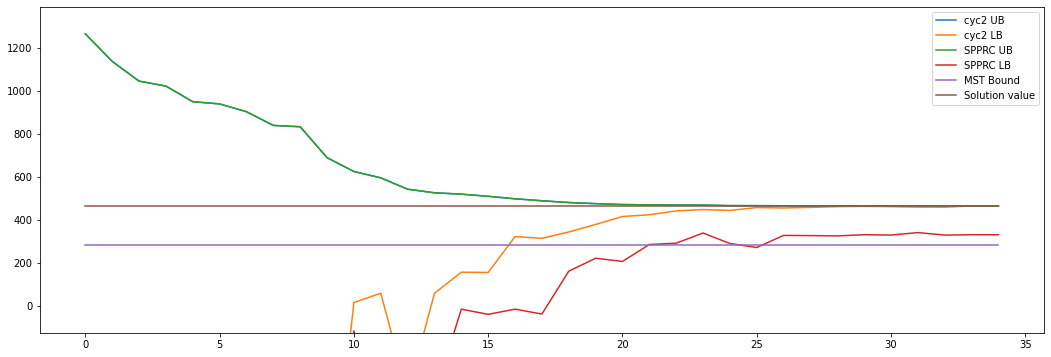

In [8]:
plt.figure(figsize=(18,6))
xmax = 0
for method in pricer.data['methods']:
    upper_bounds = [x for x,y in pricer.data['bounds'][method]]
    lower_bounds = [y for x,y in pricer.data['bounds'][method]]
    plt.plot(upper_bounds, label=f'{method} UB')
    plt.plot(lower_bounds, label=f'{method} LB')
    if upper_bounds[0] > xmax:
        xmax = upper_bounds[0]
plt.ylim((-xmax/10,xmax*1.1))

T = nx.minimum_spanning_tree(G)
mst = T.size(weight='weight') + min(G.edges().data('weight'),key=lambda edge: edge[2])[2]
mst = [mst for i in range(len(upper_bounds))]
plt.plot(mst, label="MST Bound")

solval = model.getObjVal()
sol = [solval for i in range(len(upper_bounds))]
plt.plot(sol,label="Solution value")

plt.legend(loc='upper right')

plt.show()

In [12]:
output_variables(model, pricer)

The solution contains the following paths: 
Only paths with associated value larger than 1e-06 are analysed.
0.2222222222222232 * x32563: (0, 11, 10, 0)
0.6111111111111106 * x39745: (0, 12, 10, 0)
0.16666666666666619 * x149304: (0, 13, 10, 0)
0.22222222222222243 * x155278: (0, 12, 11, 13, 9, 8, 5, 4, 21, 7, 0)
0.16666666666666619 * x156511: (0, 12, 11, 13, 9, 8, 5, 4, 21, 0)
0.055555555555555663 * x167107: (0, 21, 4, 5, 8, 9, 13, 6, 1, 2, 3, 16, 15, 14, 17, 22, 20, 0)
0.055555555555555663 * x167115: (0, 21, 4, 5, 8, 9, 6, 1, 2, 3, 16, 15, 14, 17, 22, 19, 18, 0)
0.055555555555555663 * x167116: (0, 21, 4, 5, 8, 9, 6, 1, 2, 3, 16, 15, 17, 22, 20, 19, 18, 0)
0.38888888888888873 * x167128: (0, 18, 19, 20, 22, 17, 14, 15, 16, 3, 2, 1, 6, 13, 9, 7, 0)
0.38888888888888806 * x167476: (0, 18, 19, 20, 22, 17, 14, 15, 16, 3, 2, 1, 6, 11, 7, 8, 5, 4, 21, 0)
0.027777777777777277 * x167573: (0, 21, 4, 5, 8, 9, 6, 1, 3, 15, 14, 20, 19, 18, 0)
0.027777777777777277 * x167589: (0, 18, 19, 20, 14, 15, 16,